In [ ]:
## Use package to convert excel files into csv files 

In [ ]:
import xlrd
import csv

In [5]:
def csv_from_excel(file_name, sheet_name):
    wb = xlrd.open_workbook(file_name + '.xlsx')
    sh = wb.sheet_by_name(sheet_name)
    your_csv_file = open(file_name + '.csv', 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

# runs the csv_from_excel function:
csv_from_excel('Forwards', 'Sheet1')
csv_from_excel('LMPs', 'LMPs')


In [ ]:
## begin building simple linear regression

In [16]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [17]:
## from https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/

In [18]:
# Changing the file read location to the location of the dataset 
df = pd.read_csv('LMPs.csv') 
df_energies = df[['Date', 'Hour Code ', 'Unique Code ', 'HB_WEST Hourly Real Time SPP', 
             'DOMINION HUB Hourly Real Time LMP', 'SPPNORTH_HUB Hourly Real Time LMP', 
             'HB_NORTH Hourly Real Time SPP']] 
  
# Taking only the selected two attributes from the dataset 
df_energies.columns = ['Date', 'Hour Code', 'Unique Code', 'HB West', 'DH', 'SPPN', 'HB North'] 
  
# Renaming the columns for easier writing of the code 
df_energies.head() 
  
# Displaying only the 1st  rows along with the column names 


,Date,Hour Code,Unique Code,HB West,DH,SPPN,HB North
0,43769.958333,7295.0,1.0,9.6700,23.12282,14.594260,14.8200
1,43769.916667,7294.0,2.0,11.9100,26.47787,-4.860908,16.8150
2,43769.875000,7293.0,3.0,5.5350,34.36818,-1.249042,18.2675
3,43769.833333,7292.0,4.0,14.3875,41.10913,0.666175,18.7675
4,43769.791667,7291.0,5.0,17.8350,57.78925,20.390040,18.4250


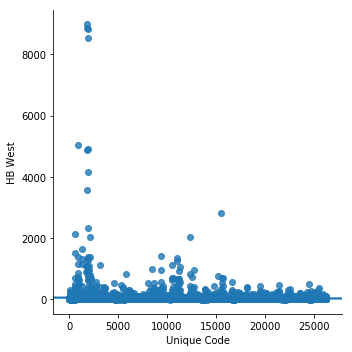

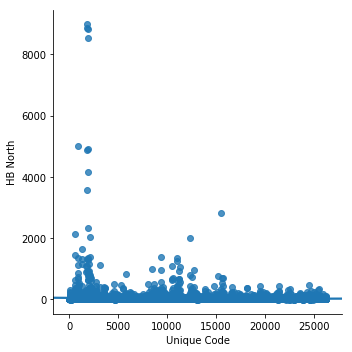

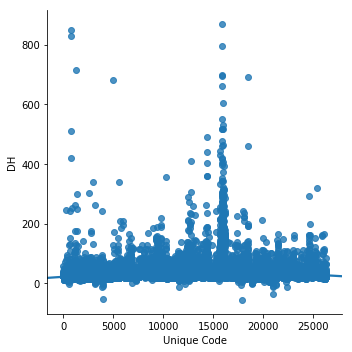

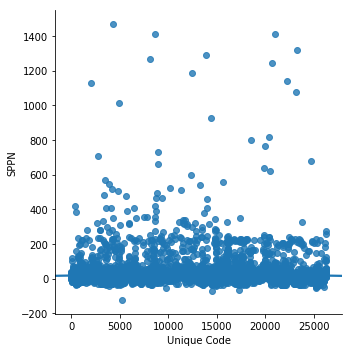

In [19]:
# Scatter plotting some of the data 

# hourly HB West
sns.lmplot(x ="Unique Code", y ="HB West", data = df_energies, order = 2, ci = None) 

# hourly HB North
sns.lmplot(x ="Unique Code", y ="HB North", data = df_energies, order = 2, ci = None) 

# hourly  Dominion Hub 
sns.lmplot(x ="Unique Code", y ="DH", data = df_energies, order = 2, ci = None) 

# hourly SPP North Hub
sns.lmplot(x ="Unique Code", y ="SPPN", data = df_energies, order = 2, ci = None) 


In [20]:
# Eliminating NaN or missing input numbers in dataset 

df_energies.fillna(method ='ffill', inplace = True) 

In [40]:
## Training and fitting data for ALL 3 years 

for_loop_array = ['HB West', 'DH', 'SPPN', 'HB North']
results_array = []

for i in range(4):
    
    # Seperating the data into independent and dependent variables 
    # Converting each dataframe into a numpy array  
    # since each dataframe contains only one column 
    
    X = np.array(df_energies['Unique Code']).reshape(-1, 1) 
    y = np.array(df_energies[for_loop_array[i]]).reshape(-1, 1) 
     
    # Dropping any rows with Nan values 
    # df_energies.dropna(inplace = True) 
    
    # Splitting the data into training and testing data, doing the regression and printing results 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)  
    regr = LinearRegression() 
    regr.fit(X_train, y_train) 
    result = regr.score(X_test, y_test)
    print(result)
    results_array.append(result)


0.002002410901496887
0.0027609197242568495
-0.00045272706331411783
0.002604863748695063


-0.20981776956571307


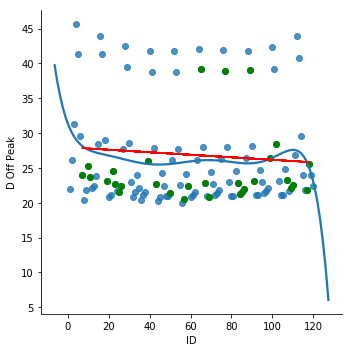

In [365]:
## Prediction for 15-20 years based off of current SNP 10 year predictions

# add column with ids to forwards.csv
with open("Forwards.csv", 'r') as input, open('Forwards2.csv', 'w') as output:
    reader = csv.reader(input, delimiter = ',')
    writer = csv.writer(output, delimiter = ',')

    all = []
    row = next(reader)
    row.insert(0, 'ID')
    all.append(row)
    for k, row in enumerate(reader):
        all.append([str(k+1)] + row)
    writer.writerows(all)
    

df = pd.read_csv('Forwards2.csv') 
df_forwards = df[["ID", "Term"," D Off Peak ","D On Peak ","HW Off Peak ","HW On Peak ","HN Off Peak ",
                  "HN On Peak ","SSP Off Peak ","SSPOn Peak "]] 
  
# Taking only the selected two attributes from the dataset 
df_forwards.columns = ["ID", "Term","D Off Peak","D On Peak","HW Off Peak","HW On Peak","HN Off Peak",
                      "HN On Peak","SSP Off Peak","SSP On Peak"] 
  
# Renaming the columns for easier writing of the code 
df_forwards.head() 

# Scatter plotting some of the data 

# hourly HB West
#sns.lmplot(x ="ID", y ="D On Peak", data = df_forwards, order = 2, ci = None) 

# hourly HB North
#sns.lmplot(x ="ID", y ="HW On Peak", data = df_forwards, order = 5, ci = None) 

# hourly  Dominion Hub 
#sns.lmplot(x ="ID", y ="HN On Peak", data = df_forwards, order = 2, ci = None) 

# hourly SPP North Hub
#sns.lmplot(x ="ID", y ="SSP On Peak", data = df_forwards, order = 2, ci = None) 


for_loop_array = ["HW Off Peak","HW On Peak","D Off Peak","D On Peak", "SSP Off Peak","SSP On Peak", 
                  "HN Off Peak","HN On Peak"]
results_array = []

for i in range(len(for_loop_array)):
    
    # Seperating the data into independent and dependent variables 
    # Converting each dataframe into a numpy array  
    # since each dataframe contains only one column 
    
    X = np.array(df_forwards['ID']).reshape(-1, 1) 
    y = np.array(df_forwards[for_loop_array[i]]).reshape(-1, 1) 
     
    # Dropping any rows with Nan values 
    # df_energies.dropna(inplace = True) 
    
    # Splitting the data into training and testing data, doing the regression and printing results 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)  
    regr = LinearRegression() 
    regr.fit(X_train, y_train) 
    result = regr.score(X_test, y_test)
    #print(result)
    results_array.append(result)
    y_pred = regr.predict(X_test) 
    #plt.scatter(X_test, y_test, color ='b') 
    #plt.plot(X_test, y_pred, color ='k') 

    #plt.show() 
    

df_forwards20 = df_forwards[:][:120] 
#print(df_forwards20)
  
# Selecting the 1st 20 rows of the data 
sns.lmplot(x ="ID", y ="D Off Peak", data = df_forwards20, 
                               order = 7, ci = None) 



df_forwards20.fillna(method ='ffill', inplace = True) 
  
X = np.array(df_forwards20['ID']).reshape(-1, 1) 
y = np.array(df_forwards20['D Off Peak']).reshape(-1, 1) 
  
df_forwards20.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 

regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 


y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='g') 
plt.plot(X_test, y_pred, color ='r') 
#print(y_pred)
  
plt.show() 


In [366]:
## predictions for 15-20 years based off of seasonal changes from S&P projections for next 10 years

h, w = (int)(df_forwards.shape[0] / 4.0), df_forwards.shape[1]
winter = [[0 for x in range(w)] for y in range(h)] 
spring = [[0 for x in range(w)] for y in range(h)] 
fall = [[0 for x in range(w)] for y in range(h)] 
summer = [[0 for x in range(w)] for y in range(h)] 
winter_iter = 0
spring_iter = 0
summer_iter = 0
fall_iter = 0

# organize data into the seasons 
for row in df_forwards.iterrows():
    if row[1][0] % 12 == 3 or row[1][0] % 12 == 4 or row[1][0] % 12 == 5:
        for i in range (len(row[1])):
            winter[winter_iter][i] = row[1][i]
        winter_iter += 1
    elif row[1][0] % 12 == 6 or row[1][0] % 12 == 7 or row[1][0] % 12 == 8:
        for i in range (len(row[1])):
            spring[spring_iter][i] = row[1][i]
        spring_iter += 1
    elif row[1][0] % 12 == 9 or row[1][0] % 12 == 10 or row[1][0] % 12 == 11:
        for i in range (len(row[1])):
            summer[summer_iter][i] = row[1][i]
        summer_iter += 1
    else:
        for i in range (len(row[1])):
            fall[fall_iter][i] = row[1][i]
        fall_iter += 1

# rather inefficient to put all data into matricies first but this step turns them all into dataframes
df_winter = pd.DataFrame(data=winter, columns = df_forwards.columns )
df_spring = pd.DataFrame(data=spring, columns = df_forwards.columns )
df_summer = pd.DataFrame(data=summer, columns = df_forwards.columns )
df_fall = pd.DataFrame(data=fall, columns = df_forwards.columns )

# new arrays 
dataframes = [df_winter, df_spring, df_summer, df_fall]
seasons = ['winter', 'spring', 'summer', 'fall']

# creating some averages for slopes 
h, w = 4, 8
average1 = [[0 for x in range(w)] for y in range(h)]

# iterate through machine learning regression process many times to get trends for each developer during each season 
iterations = 1000
for k in range(iterations):
    for i in range(4):
        #print(seasons[i] + " results -- \n")
        for j in range(len(for_loop_array)):


            # Seperating the data into independent and dependent variables 
            # Converting each dataframe into a numpy array  
            # since each dataframe contains only one column 

            X = np.array(dataframes[i]['ID']).reshape(-1, 1) 
            y = np.array(dataframes[i][for_loop_array[j]]).reshape(-1, 1) 

            # Dropping any rows with Nan values 
            # df_energies.dropna(inplace = True) 

            # Splitting the data into training and testing data, doing the regression and printing results 

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)  
            regr = LinearRegression() 
            regr.fit(X_train, y_train) 
            result = regr.score(X_test, y_test)
            #print(for_loop_array[j] + ": " + str(result))
            average1[i][j] += float(result)
            results_array.append(result)
            y_pred = regr.predict(X_test) 

            #plt.scatter(X_test, y_test, color ='b') 
            #plt.plot(X_test, y_pred, color ='k') 

            #plt.show() 

        #print("\n")
        
        
for i in range(4):
    for j in range(8):
        average1[i][j] = round(average1[i][j]/iterations, 4)
    
print(average1)



[[0.1056, -0.1034, -0.6449, -0.4367, -0.0598, 0.0148, -0.223, 0.1954], [0.3287, 0.7396, -0.5073, -0.3713, 0.4002, 0.1672, 0.5579, 0.7164], [-0.2082, -0.5807, -0.4044, -0.2051, -0.0512, -0.2656, -0.1581, -0.5256], [-0.2058, -0.4511, -0.9576, -0.3131, 0.3374, 0.0305, -0.0949, -0.0687]]


In [ ]:
## Using historic data to predict values until 2039

In [330]:
# reformat LMP file with proper dates
from datetime import datetime


book = xlrd.open_workbook('LMPs.xlsx')
sheet = book.sheet_by_name('LMPs')
csvfile = open('LMPs2.csv', 'w')

wr = csv.writer(csvfile, quoting=csv.QUOTE_ALL)
wr.writerow(sheet.row_values(0))

for rownum in range(1,sheet.nrows):
  year, month, day, hour, minute, sec = xlrd.xldate_as_tuple(int(sheet.row_values(rownum)[0]), book.datemode)
  py_date = datetime(year, month, day, hour, minute)
  wr.writerow([py_date] + sheet.row_values(rownum)[1:])

csvfile.close()

# Changing the file read location to the location of the dataset 
df = pd.read_csv('LMPs2.csv') 
df_energies = df[['Date', 'Hour Code ', 'Unique Code ', 'HB_WEST Hourly Real Time SPP', 
             'DOMINION HUB Hourly Real Time LMP', 'SPPNORTH_HUB Hourly Real Time LMP', 
             'HB_NORTH Hourly Real Time SPP']] 
  
# Taking only the selected two attributes from the dataset 
df_energies.columns = ['Date', 'Hour Code', 'Unique Code', 'HB West', 'DH', 'SPPN', 'HB North'] 
  
# Renaming the columns for easier writing of the code 
#print(df_energies.head(30))
  
# Displaying only the 1st  rows along with the column names 

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


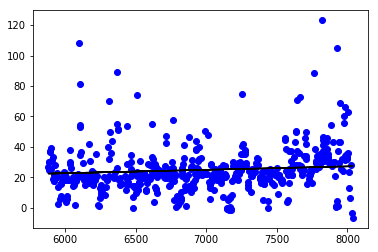

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


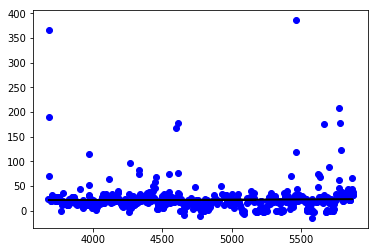

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


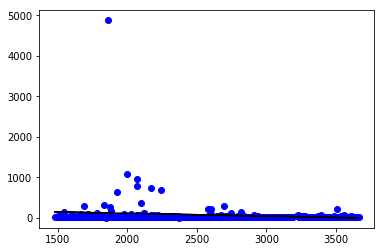

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


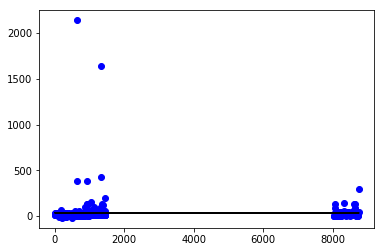

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


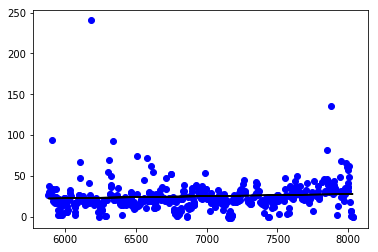

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


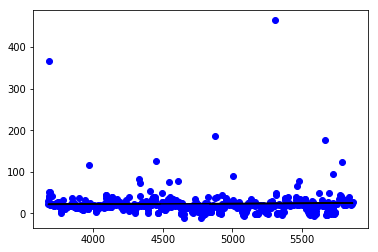

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


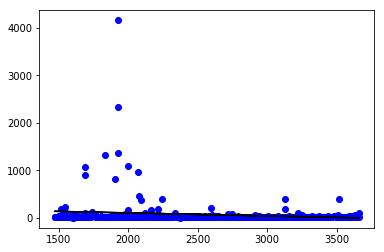

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


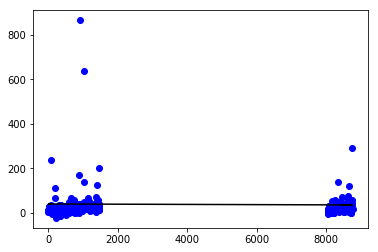

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


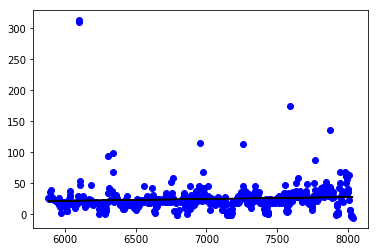

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


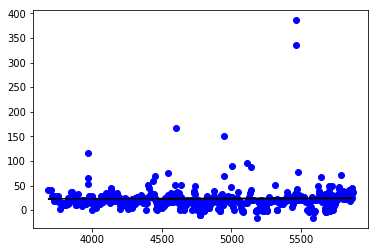

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


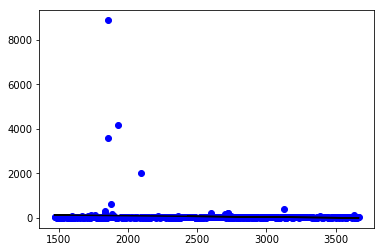

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


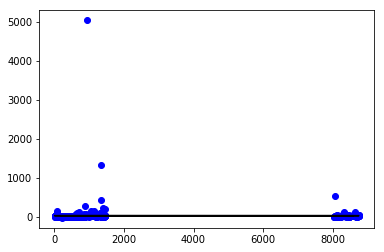

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


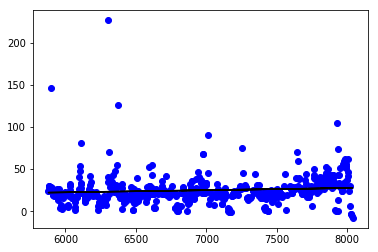

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


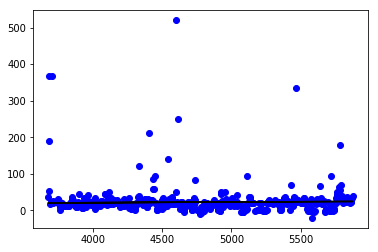

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


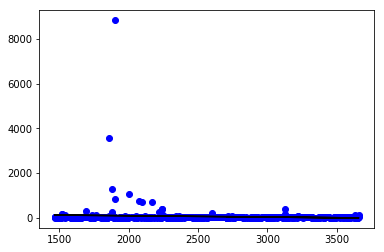

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


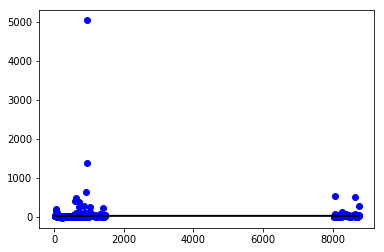

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


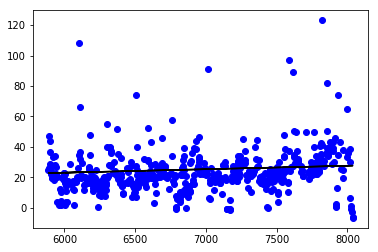

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


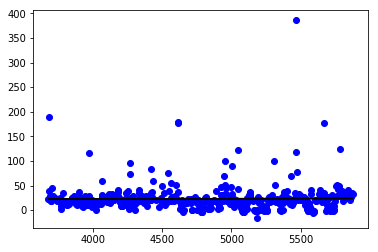

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


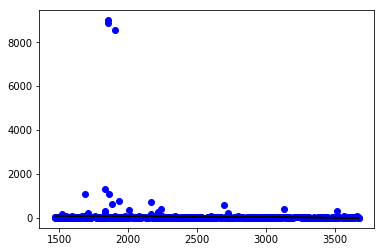

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


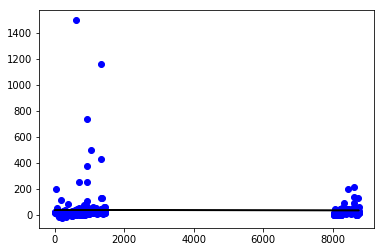

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


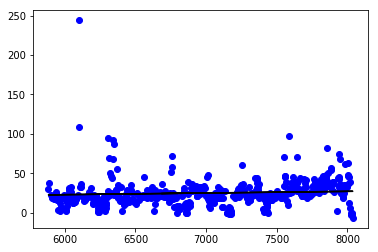

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


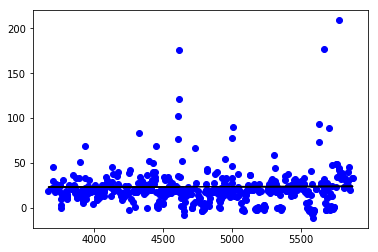

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


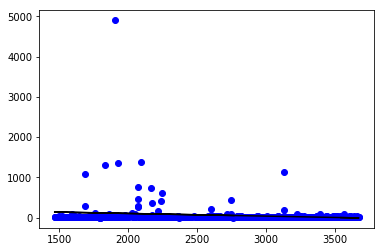

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


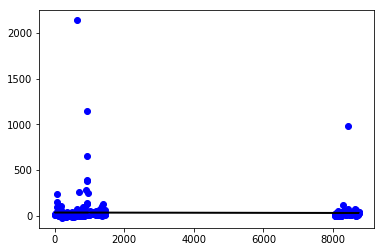

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


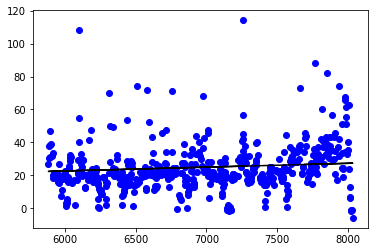

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


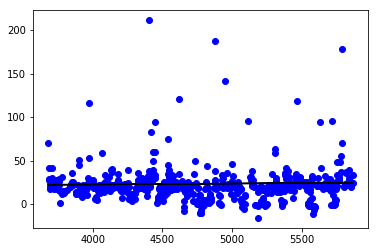

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


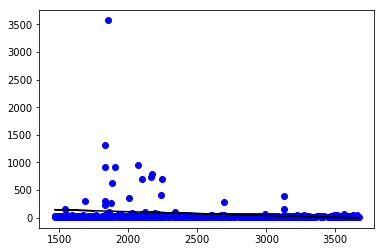

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


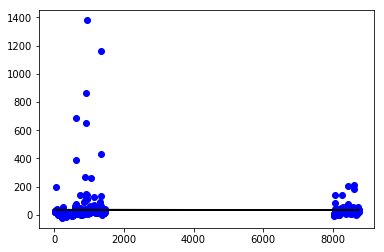

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


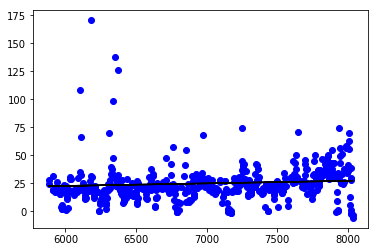

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


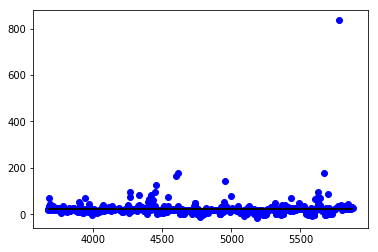

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


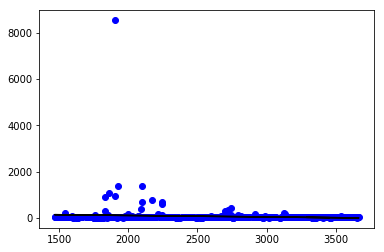

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


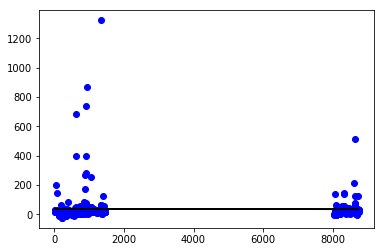

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


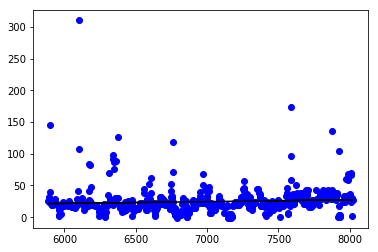

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


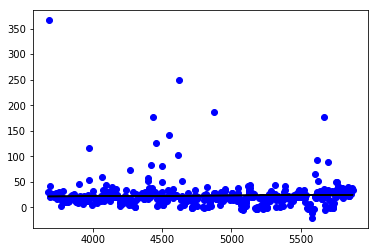

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


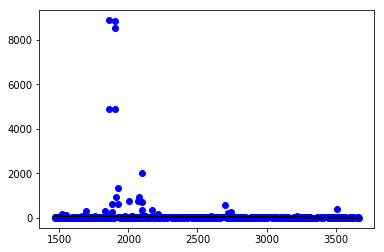

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


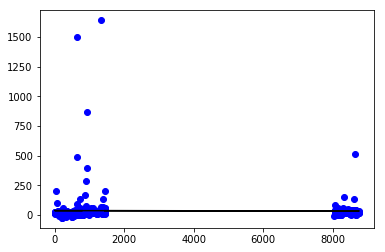

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


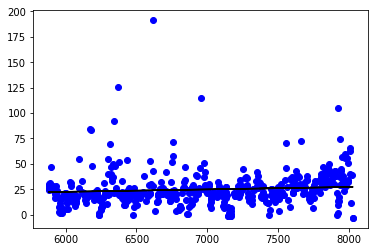

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


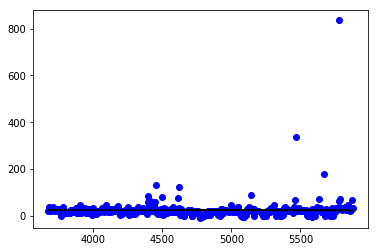

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


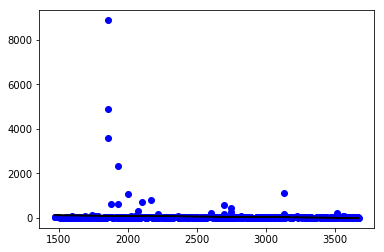

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


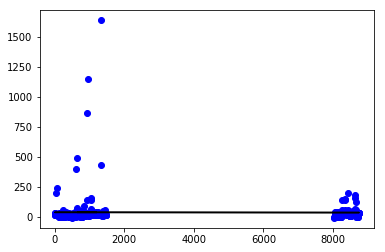

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


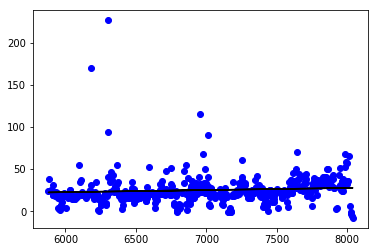

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


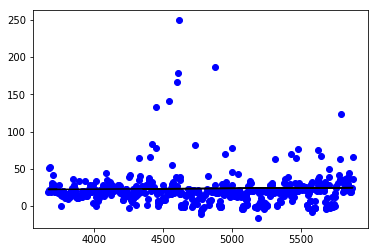

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


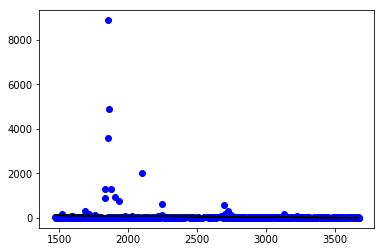

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


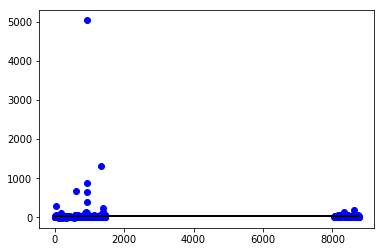

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


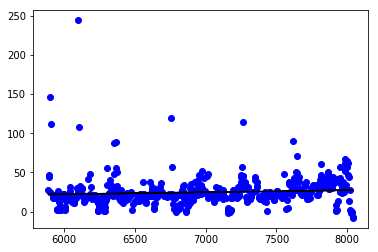

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


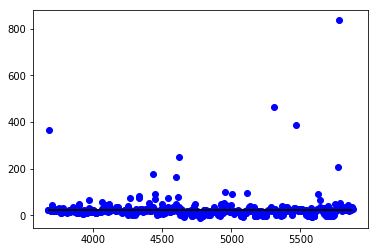

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


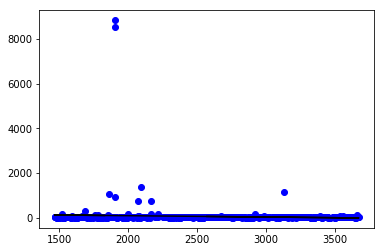

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


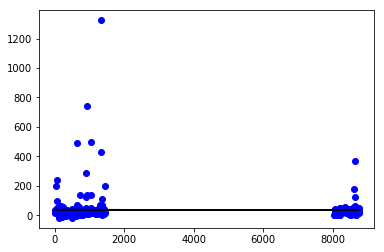

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


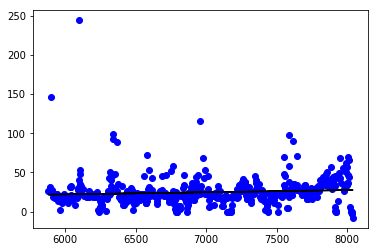

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


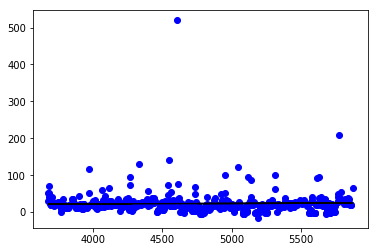

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


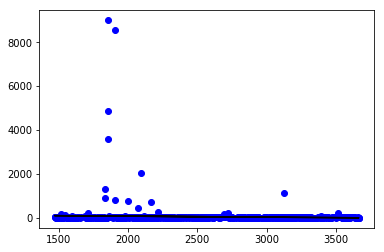

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


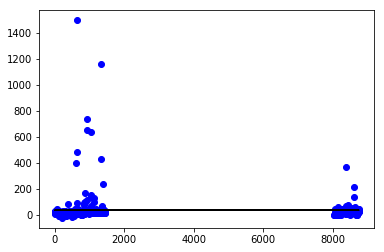

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


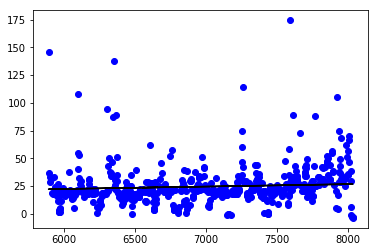

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


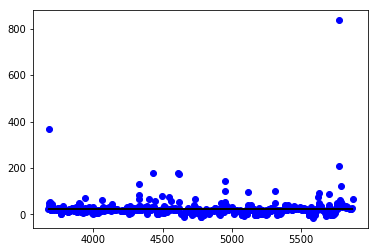

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


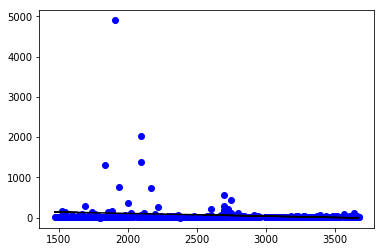

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


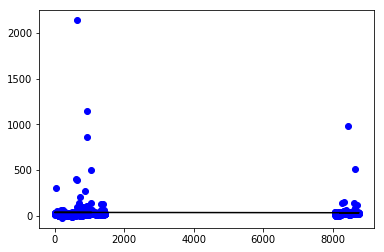

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


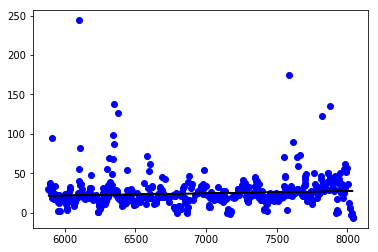

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


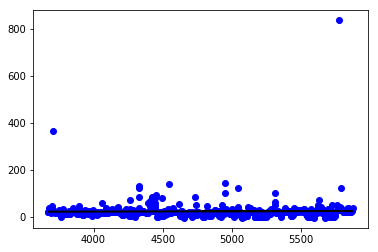

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


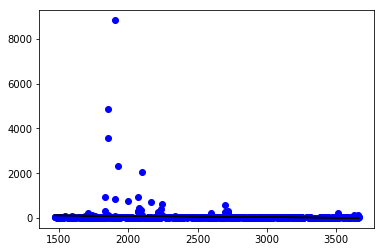

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


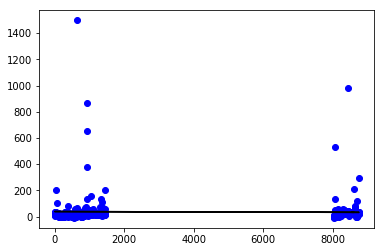

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


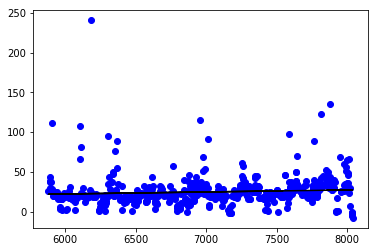

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


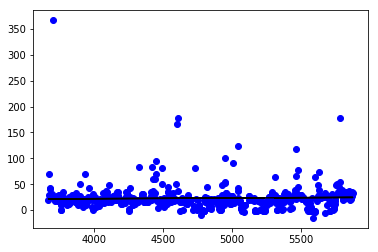

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


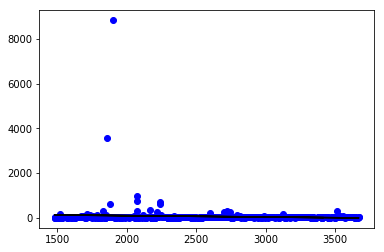

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


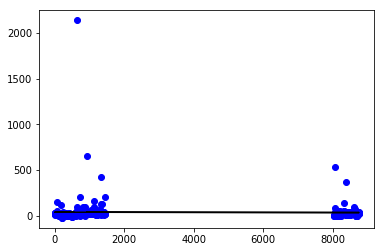

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


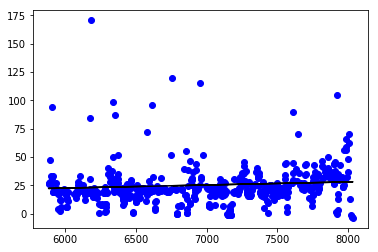

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


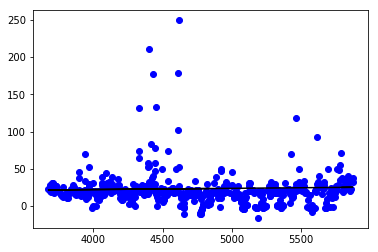

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


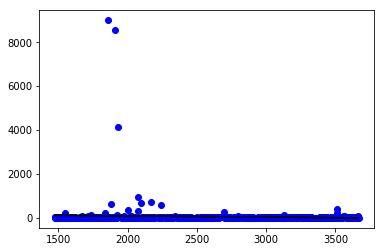

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


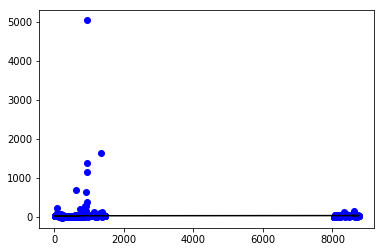

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


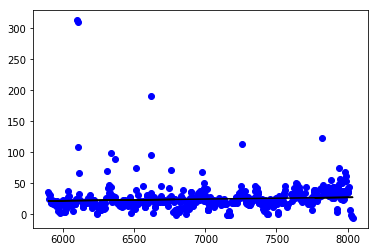

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


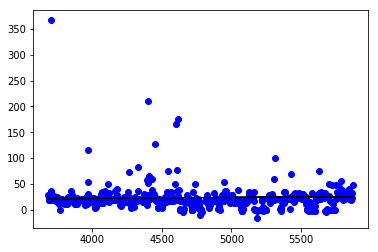

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


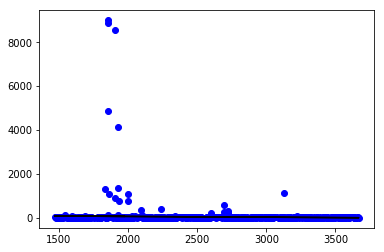

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


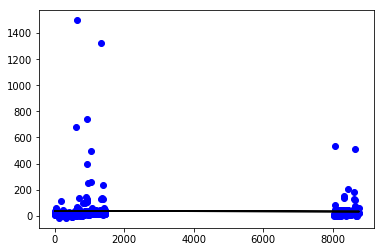

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


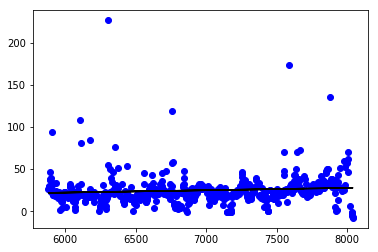

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


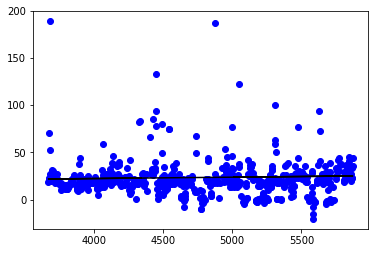

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


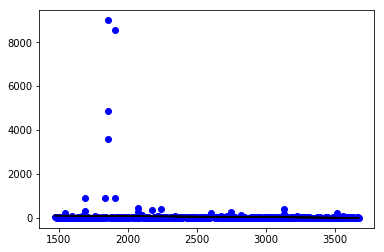

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


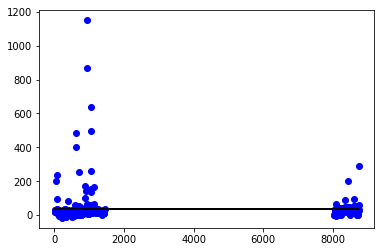

[[24.095 ]
 [26.21  ]
 [26.7025]
 ...
 [-5.805 ]
 [-6.7125]
 [-7.995 ]]


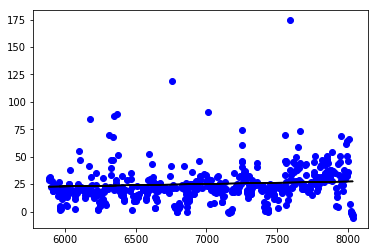

[[18.515 ]
 [21.6375]
 [23.2675]
 ...
 [31.1325]
 [33.73  ]
 [27.1625]]


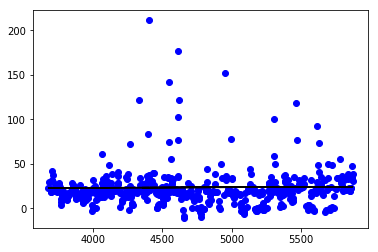

[[16.8825]
 [17.73  ]
 [18.8375]
 ...
 [18.3625]
 [18.575 ]
 [16.3425]]


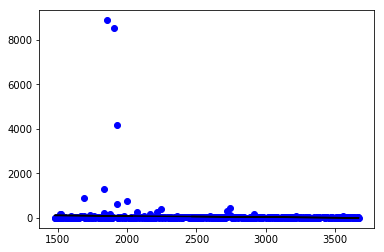

[[ 9.67  ]
 [11.91  ]
 [ 5.535 ]
 ...
 [18.7725]
 [18.845 ]
 [18.7675]]


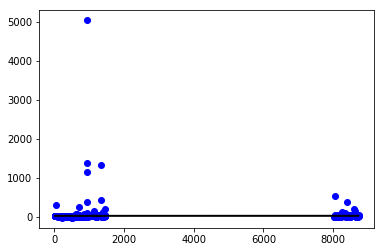

[[0.0146, 0.0073, 0.0016, 0.0199], [-0.0055, 0.0147, -0.004, -0.0025], [0.0026, -0.0045, -0.0023, -0.0034], [-0.0048, 0.0176, 0.0187, -0.0067]]


In [343]:
# first hour of 2017 24815
# last hour of 207 16056

winter_iter, spring_iter, summer_iter, fall_iter = 0, 0, 0, 0
columns = ['Date', 'Hour Code', 'Unique Code', 'HB West', 'DH', 'SPPN', 'HB North']
df_winter = pd.DataFrame(columns = columns )
df_spring = pd.DataFrame(columns = columns )
df_summer = pd.DataFrame(columns = columns )
df_fall = pd.DataFrame(columns = columns )

# organize data into the seasons 
counter = 0 
for row in df_energies.iterrows():
    if counter >= 8760:
        break
    if (int)(row[1][0][5:7]) == 1 or (int)(row[1][0][5:7]) == 2 or (int)(row[1][0][5:7]) == 12:
        for i in range (len(row[1])):
            df_winter.loc[winter_iter] = row[1]
        winter_iter += 1
    elif (int)(row[1][0][5:7]) == 4 or (int)(row[1][0][5:7]) == 5 or (int)(row[1][0][5:7]) == 3:
        for i in range (len(row[1])):
            df_spring.loc[spring_iter] = row[1]
        spring_iter += 1
    elif (int)(row[1][0][5:7]) == 7 or (int)(row[1][0][5:7]) == 8 or (int)(row[1][0][5:7]) == 6:
        for i in range (len(row[1])):
            df_summer.loc[summer_iter] = row[1]
        summer_iter += 1
    else:
        for i in range (len(row[1])):
            df_fall.loc[fall_iter] = row[1]
        fall_iter += 1
    counter += 1 
    

df_winter.dropna(inplace = True) 
df_spring.dropna(inplace = True) 
df_summer.dropna(inplace = True) 
df_fall.dropna(inplace = True) 
#print(df_fall)
#print(df_winter)


# new arrays 
dataframes = [df_winter, df_spring, df_summer, df_fall]
seasons = ['winter', 'spring', 'summer', 'fall']


# iterate through machine learning regression process many times to get trends for each developer during each season 
columns_we_care_about = ['HB West', 'DH', 'SPPN', 'HB North']
h, w = 4, 4
averages = [[0 for x in range(w)] for y in range(h)]
iterations = 20
for k in range(iterations):
    for i in range(4):
        #print(seasons[i] + " results -- \n")
        x = 0
        for j in range(len(columns_we_care_about)):


            # Seperating the data into independent and dependent variables 
            # Converting each dataframe into a numpy array  
            # since each dataframe contains only one column 
            
            X = np.array(dataframes[i]['Unique Code']).reshape(-1, 1) 
            y = np.array(dataframes[i][columns_we_care_about[j]]).reshape(-1, 1) 
            
            # Dropping any rows with Nan values 
            # df_energies.dropna(inplace = True) 

            # Splitting the data into training and testing data, doing the regression and printing results 

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)  
            regr = LinearRegression() 
            regr.fit(X_train, y_train) 
            result = regr.score(X_test, y_test)
            #print(for_loop_array[j] + ": " + str(result))
            averages[i][j] += float(result)
            y_pred = regr.predict(X_test) 
            
            if (x == 0):
                print(y)
                plt.scatter(X_test, y_test, color ='b') 
                plt.plot(X_test, y_pred, color ='k') 

                plt.show() 

            x += 1

        #print("\n")

for i in range(4):
    for j in range(4):
        averages[i][j] = round(averages[i][j]/iterations, 4)
    
print(averages)

In [ ]:
## Comparing projections from historic data to S&P data for next 10 years 

In [369]:
## Find projected y value at year 2020 for 4 seasons, 4 ISOs, 2 Peaks/day using most recent 2019 data 

# seasons array in order of winter spring summer fall 
h, w = 4, 8
seasonal_start_values = [[0 for x in range(w)] for y in range(h)]
end_values = [[0 for x in range(w)] for y in range(h)]
seasonal_start_values[3] = [23.43, 2.19, 28.01, 13.76, 17.97, 11.76, 17.99, 8.28]
seasonal_start_values[0] = [19.25, 21.17, 28.43, 29.46, 29.92, 17.88, 20.70, 21.18]
seasonal_start_values[1] = [17.43, -1.06, 25.35, 19.63, 18.28, 6.79, 17.43, -1.19]
seasonal_start_values[2] = [22.72, 17.78, 29.71, 22.74, 26.76, 15.70, 25.73, 17.91]

for i in range(4):
    for j in range(8): 
        # 3 months times the monthly average for the season plus the start value in 2019
        end_values[i][j] = round(3*average1[i][j] + seasonal_start_values[i][j], 4)


print(end_values)


[[19.5668, 20.8598, 26.4953, 28.1499, 29.7406, 17.9244, 20.031, 21.7662], [18.4161, 1.1588, 23.8281, 18.5161, 19.4806, 7.2916, 19.1037, 0.9592], [22.0954, 16.0379, 28.4968, 22.1247, 26.6064, 14.9032, 25.2557, 16.3332], [22.8126, 0.8367, 25.1372, 12.8207, 18.9822, 11.8515, 17.7053, 8.0739]]
